# Introduction

In recent years, the demand for dating apps has increased. These apps provide a huge amount of data about how people experience online romance.

This project gets data from an online dating app, OKCupid, to find some interesting patterns about the online dating app community as well as create some models that may help in the matching services of the OKCupid app.

# Scoping

## Project Goals
The objective of this project is to use the knowledge gained from Codecademy and apply machine learning methods to a set of data. From there, some interesting patterns and models can be investigated.

Questions that will be answered in this report include:

## Data
The data is stored in `profiles.csv` provided by Codecademy. Each row in the dataset equivalents to an user, and each column represents the responses to their user profiles which include multi-choice and short answer questions.

## Analysis
First, the project will use some data manipulation, data wrangling and data tidying methods to clean the data for the next steps. Then, summary statistics are applied to find some interesting patterns in side the data. Some visualizations of data will be shown in this report which gives a better representation of patterns. Some classcification and clusterings algorithms will be implemented

## Evaluation

A validation data set will be taken from the original data set for evaluation task of this project. The model can be evaluated through confusion matrix, or N-fold cross-validation. Some metrics such as accuracy, precision, recall, F1 


# Coding
## Import neccessary Python modules

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline 
#Allow you to disable interactivity with plots

## Investigate the data

In [11]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


There are 59946 rows and 31 columns

In [13]:
profiles.shape


(59946, 31)

In [12]:
profiles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

### Data Characteristics
`profiles` has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning. 

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…


### Explore the Data set

In [16]:
profiles.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

We can see that there are more male uses the dating app than women.

We can see that all columns are represented with an appropriate data type, however we can see that there is many missing data. 

In [14]:
profiles.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

The code block above shows how many missing data in each column. However, three numerical column including age, heigh and income mostly does not have any nan data. However, outliers may appears in these attributes.

In [15]:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


We can see that there are outliers in these attribute.
75% users are under 37, however, the oldest is 110 years old which seems impossible to use this app. 

The "age" attribute visualization

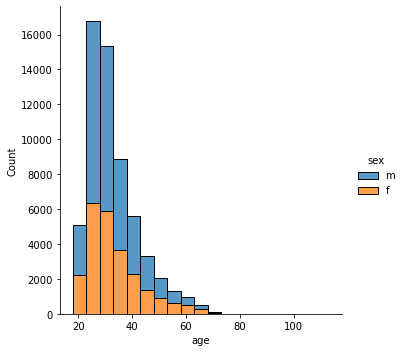

In [19]:
sns.displot(data=profiles, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack")

We can conclude that most user range from 18 to under 80. Therefore, the datapoint which has "age" >80 are not really valuable.

In [20]:
profiles["age"] = profiles[profiles["age"] <=80]["age"]
profiles.max() #the highest age is 69

There are outliers in "height". The min value of "height" is 1 inch which is impossible. The height of the shortest person in the wolrd is about 20 inches. Therefore, we should inspect datapoints which the "height" value is under 20 to see if these data points are valueable.


In [29]:
profiles[profiles["height"] <= 20]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
12193,30.0,NaN,mostly vegetarian,socially,NaN,graduated from space camp,"well, hello and thank you for stopping by my g...","i mostly try to be good at what i do, maintain...",folding laundry.,perhaps my eyes? i'm told they are a unique co...,...,"berkeley, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,judaism but not too serious about it,f,taurus but it doesn&rsquo;t matter,no,english,single
18832,39.0,athletic,NaN,socially,never,graduated from masters program,home: i was a happy surprise for my parents. y...,working at a start-up in technology. never rea...,online dating. it's the dating in real life th...,that i am trying to notice what they are tryin...,...,"san francisco, california",NaN,straight,likes dogs,christianity but not too serious about it,m,gemini but it doesn&rsquo;t matter,no,"english (fluently), chinese (okay), french (po...",single
23767,32.0,thin,mostly anything,desperately,NaN,working on ph.d program,small teller of tall tales. nostalgiaphile. un...,entropologist/enigmatologist/muse/things that ...,the things i don't quit. but only because i te...,something about the eyes-to-face ratio. and th...,...,"san francisco, california",NaN,straight,likes dogs and has cats,agnosticism,f,NaN,no,"english (fluently), french (okay), german (poo...",single
37111,25.0,fit,mostly anything,socially,never,graduated from college/university,dating me is not for everyone. i will frequent...,"in preschool, i was the boy that drew transfor...",besides the obvious stated above:<br />\ncrack...,"the hair. and yes, they're deadly poisonous sp...",...,"san mateo, california",NaN,straight,NaN,NaN,m,leo and it&rsquo;s fun to think about,when drinking,"english (fluently), chinese (fluently), japane...",single
45959,36.0,NaN,NaN,very often,never,graduated from college/university,i'm a transplant from southern california with...,"living each day as if it'd be my last, and man...","writing, rambling, fixing anything thats break...","my otherwise perfect hair, my half-sleeve tatt...",...,"oakland, california",NaN,straight,likes dogs and has cats,judaism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,"english (fluently), c++ (fluently), hebrew (po...",single
56287,25.0,NaN,NaN,often,often,working on space camp,i love not dancing and portobello mushrooms. a...,walking around town left handed.,being online and starting collections. i am re...,my long fingers and ability to be awkward.,...,"san francisco, california",NaN,straight,has dogs and dislikes cats,other and laughing about it,f,cancer but it doesn&rsquo;t matter,yes,"english (fluently), spanish (poorly)",single


These datapoint seems valuable in some attributes. We can assume that these users has typo in their height. 
We convert every "height" value <= 20 to NaN

In [38]:
for height in profiles[profiles["height"]<= 20]["height"]:
    profiles["height"]= profiles["height"].replace(height, np.nan)

# profiles["height"].isna().sum()

9

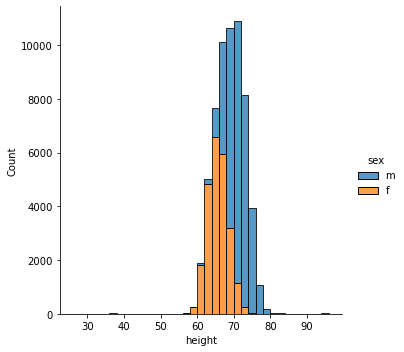

In [41]:
sns.displot(data=profiles, x="height",hue="sex", kind="hist", binwidth = 2, multiple = "stack");

The above plot shows the height variable, most people look like they are between 60 inches tall and 80 inches tall. Females tend to be shorter than males and looks to have a normal distribution.

We also can see that most of people do not show their income on the app. The missing data here is indicated with value "-1". In my opinion, -1 should be convereted to np.nan

In [42]:
profiles["income"]= profiles["income"].replace(-1, np.nan)
profiles["income"].isna().sum()

48442

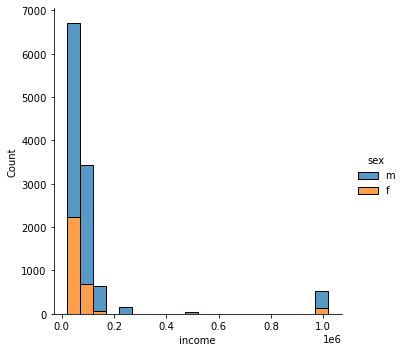

In [44]:
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack")

There are some outliers. We can limit the income to under 400000 to see the income distribution

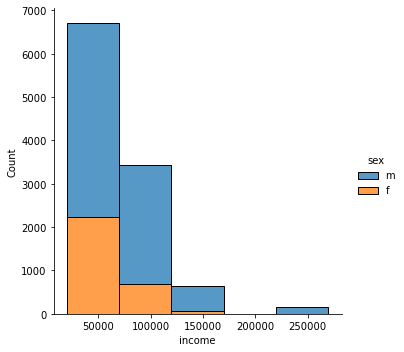

In [45]:
sns.displot(data=profiles[profiles["income"]<=400000], x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack")